In [1]:
# Please, run this cell

import numpy as np
from math import *

from time import time

def exact_checker(middle):
    count=0
    
    st=time()
    f=lambda x: cos(x)
    a=0
    b=np.pi/2
    n=101
    I=middle(f, a, b,  n)
    dur=time()-st
    err=np.abs(I-1)
    print('Test 1  |::|  err=', err, '  |::|   time=', dur, 's')
    if err<0.05:
        count+=1
        print('Test 1  |::|  accuracy OK')
    else:
        print('Test 1  |::|  accuracy FAILED')
    
    st=time()
    f=lambda x: x**x
    a=0
    b=2
    n=101
    I=middle(f, a, b,  n)
    dur=time()-st
    err=np.abs(I-2.83288)
    print('Test 2  |::|  err=', err, '  |::|   time=', dur, 's')
    if err<0.05:
        count+=1
        print('Test 2  |::|  accuracy OK')
    else:
        print('Test 2  |::|  accuracy FAILED')
        
    st=time()
    f=lambda x: e**(-x**2)
    a=-2
    b=2
    n=201
    I=middle(f, a, b,  n)
    dur=time()-st
    err=np.abs(I-1.7641627)
    print('Test 3  |::|  err=', err, '  |::|   time=', dur, 's')
    if err<1.9:
        count+=1
        print('Test 3  |::|  accuracy OK')
    else:
        print('Test 3  |::|  accuracy FAILED')
    print('Passed: ', count, '/3')


# Numerical Integration

As we discussed during the week, differentiation is the technical and always manageable task. In the same time calculation of the definite integral by the **fundamental theorem of calculus** requires _integrability in elementary functions_ (which is not guaranteed at all).

Thus the closest one can get to the estimation of such integral is **numerical approximation**.

We propose you to try yourself in this task following our instructions.

## Quick refresher

Assume that we have some nice smooth function $f(x)$ on a segment $[a,b]$.

To compute definite integral, one should consider tagged partition of the segment:
$$
a=x_0<x_1<x_2<\ldots<x_n=b
$$
with tagging $t_i \in [x_{i-1}, x_i]$. We assume uniform grid:
$$
x_i-x_{i-1}=h
$$
Then Riemann sum is an approximation of the integral:
$$
R(t, h)=\sum_{i=1}^n f(t_i) (x_i-x_{i-1})=h \sum_{i=1}^n f(t_i)
$$

![1](pic12.png)

### Task 1. Midpoint rule

Let us start with basic imports: we start with `numpy` and `math` to work with arrays and mathematical functions (for `numpy` introduction and playground you can refer to the last week of our course or your Python course):

In [2]:
import numpy as np
from math import *

Also we import and setup a couple of plotting libraries to make life prettier:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 4.0})
sns.set_palette('cubehelix')

%matplotlib inline

Now we ask you to implement midpoint rule:

![](pic13.png)

In other words: 
$$
t_i=\frac{x_{i-1}+x_i}{2}
$$
$$
\int_a^b f(x)dx \approx \frac{b-a}{n}\sum_{i=1}^n f\left( \frac{x_{i-1}+x_i}{2} \right) 
$$

Write the function
```
def middle(f, a, b, n):
```
that takes as an input function `f` and returns the Riemann sum by midpoint rule:

In [4]:
def middle(f, a, b, n):
    # your code goes here
    h = (b - a) / n # Step of integration
    I = 0.0
    for i in range(0, n):
        I += f(a + h / 2 + i * h) # Half-step -- the middle point
    I *= h
    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [5]:
exact_checker(middle)

Test 1  |::|  err= 1.0078335895835622e-05   |::|   time= 0.0 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.0008017693099344747   |::|   time= 0.0 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 2.4990918379153015e-06   |::|   time= 0.0 s
Test 3  |::|  accuracy OK
Passed:  3 /3


### Task 2. Plot the result

Let us also plot a nice picture here. Consider $f(x)=\cos(x)$, $[a,b]=[0, \pi/2]$ and $n=10$. Plot the functions, midpoints, and corresponding reactangles (it is useful to use command `plt.bar`). You should get something like this: 

![](res.png)

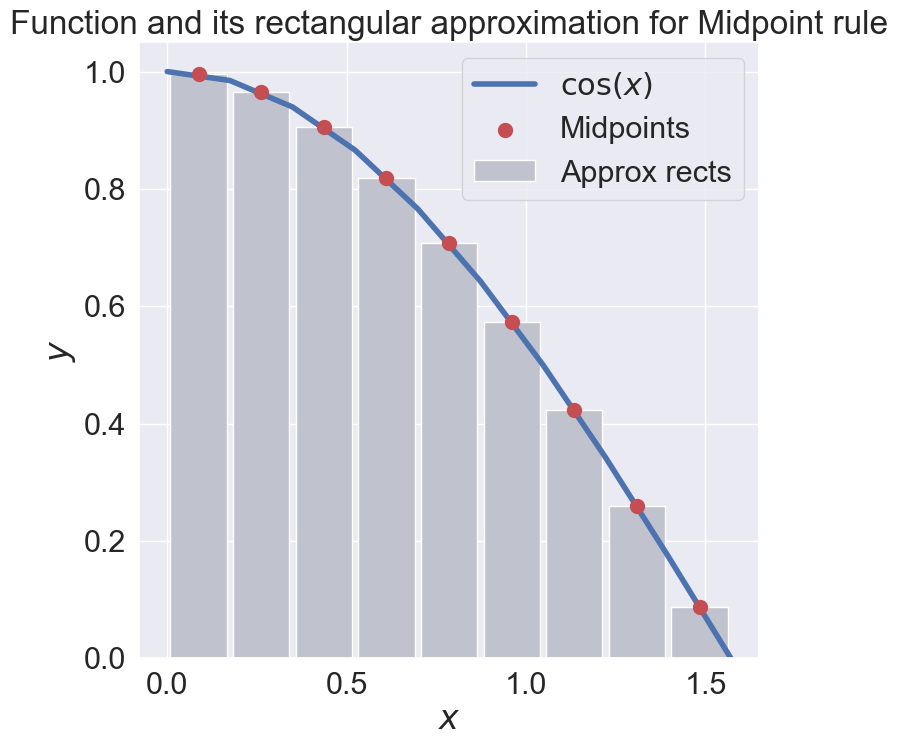

In [6]:
f = lambda x: np.cos(x)
a = 0
b = np.pi / 2
n = 10

plt.figure(figsize=(8,8))

# your code goes here
x = np.linspace(a, b, n)
y = f(x)
midpoints_x = [(x[i-1] + x[i]) / 2 for i in range(1, len(x))]
midpoints_y = [f((x[i-1] + x[i]) / 2) for i in range(1, len(x))]
plt.plot(x, y, 'b-', label='$\cos(x)$')
plt.scatter(midpoints_x, midpoints_y, s=100, color='r', zorder=2, label='Midpoints')
plt.bar(midpoints_x, midpoints_y, width=(b-a)/n, color='#C0C2CE', label='Approx rects')
plt.title('Function and its rectangular approximation for Midpoint rule')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();


### Task 3. Trapezoidal rule

The idea here is easily formulated by the picture:
![](pic11.png)
We approximate each segment with trapezoidal area:
$$
\int_a^b f(x)dx=\frac{b-a}{n}\sum_{i=1}^{n} \frac{f(x_{i-1})+f(x_i)}{2}=\frac{b-a}{n}\left(\frac{f(a)+f(b)}{2}+\sum_{i=1}^{n-1} f(x_i)\right)
$$
(basically we use the formula for the area of trapezoidal polygon $S=h\cdot(x+y)/2$ where $h$ is the height of the figure and $x$ and $y$ are lengths of parallel sides).

Write the implementation of the formula:

In [7]:
def trapezoidal(f, a, b, n):
    # your code goes here
    h = (b - a) / n # Step of integration
    I = 0.0
    for i in range(1, n):
        I += 2 * f(a + i * h)
    I += f(a) + f(b)
    I *= h / 2
    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [8]:
exact_checker(trapezoidal)

Test 1  |::|  err= 2.0156610848309775e-05   |::|   time= 0.0 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.0014098686245613834   |::|   time= 0.0 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 4.753848527272453e-06   |::|   time= 0.0 s
Test 3  |::|  accuracy OK
Passed:  3 /3


### Task 4. Simpson's rule

To proceed with the Simpson's rule, we need to improve on the general idea of Riemann sum approximation. Assume the restriction of the function on a segement $[x_{i-1}, x_i]$: instead of using the definition, one could try to approximate given function by one simpler and easier to integrate. 

Simpson's rule uses approximation by the parabolic function per each segment. In order to it, one needs **three** points -- e.g., $f(x_i)$, $f(x_{i+1}$ and $f\left(\frac{x_{i}+x_{i+1}}{2} \right)$ (the general function is described by $ax^2+bx+c$ with three parameters; following linear algebra's _Rank theorem_, one would need at least three linarly independent equations to find those parameters).
![](pic14.png)
Then approximation can be written as follows:
$$
\int_a^b f(x)dx=\frac{b-a}{3n}\left(\sum_{i=1}^{[n/2]} f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right)
$$

Write the implementation of the formula. 

**Note**: the commulitive formula will work for odd $n$ only, that's fine! (It doesn't mean that in the even case Simpson's rule is inadequate; it is just unpleasant to implement).

In [9]:
def simpson(f, a, b, n):
    # your code goes here
    h = (b - a) / n # Step of integration
    I = 0.0
    for i in range(2, n, 2): # Even terms
        I += 2 * f(a + i * h)
    for i in range(1, n, 2): # Odd terms
        I += 4 * f(a + i * h)
    I += f(a) + f(b)
    I *= h / 3
    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [10]:
exact_checker(simpson)

Test 1  |::|  err= 4.0313546734394023e-05   |::|   time= 0.0 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.024931964852767052   |::|   time= 0.0 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 0.00012625062390947406   |::|   time= 0.0 s
Test 3  |::|  accuracy OK
Passed:  3 /3


## Error estimations

Using **Taylor expansion** of the integrand function, one can establish following estimates of the global errors of the numerical methods.

| **Method** |  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  **Formula**   &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;        | **Error**  |&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     **Constant**    &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  |
|---|:--------------------------:|---|---------|
| _Middle Point_  | $\frac{b-a}{n}\sum_{i=1}^n f\left( \frac{x_{i-1}+x_i}{2} \right) $  |  $\frac{(b-a)^3}{24n^2}C$  | $\max_{[a,b]} |f^{(2)}(x)|$ |
| _Trapezoidal_  | $\frac{b-a}{n}\left(\frac{f(a)+f(b)}{2}+\sum_{i=1}^{n-1} f(x_i)\right)$ | $\frac{(b-a)^3}{12n^2}C$  | $\max_{[a,b]} |f^{(2)}(x)|$ |
| _Simpson's rule_  | $\frac{b-a}{3n}\left(\sum_{i=1}^{[n/2]} f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right)$ | $\frac{(b-a)^5}{180n^4}C $  | $\max_{[a,b]} |f^{(4)}(x)|$  |

Let us check this formula in terms of adequacy for both included derivative and order of the $n$.

### Task 5. Error and the derivative

Assume $[a,b]=[0,1]$ and $n=100$. Consider the function $f(x)=e^{ax}$ with varying $a$.
1. Compute exact value of the integral $\int_0^1 e^{ax} dx$ analytically (variable `exact`)
2. Compute and plot errors for **trapezoidal rule** with respect to $a$:

Trapezoidal rule for I of e**(ax) over [0, 1]
---------------------------------------------
a	Exact	I	Abs error	Theoretical error upper boundary
0.1	1.0517	1.0517	8.7642e-08	9.2098e-08
0.2	1.1070	1.1070	3.6900e-07	4.0713e-07
0.5	1.2974	1.2974	2.7030e-06	3.4348e-06
0.75	1.4893	1.4893	6.9812e-06	9.9234e-06
1.0	1.7183	1.7183	1.4319e-05	2.2652e-05
2.0	3.1945	3.1946	1.0648e-04	2.4630e-04
3.0	6.3618	6.3623	4.7713e-04	1.5064e-03


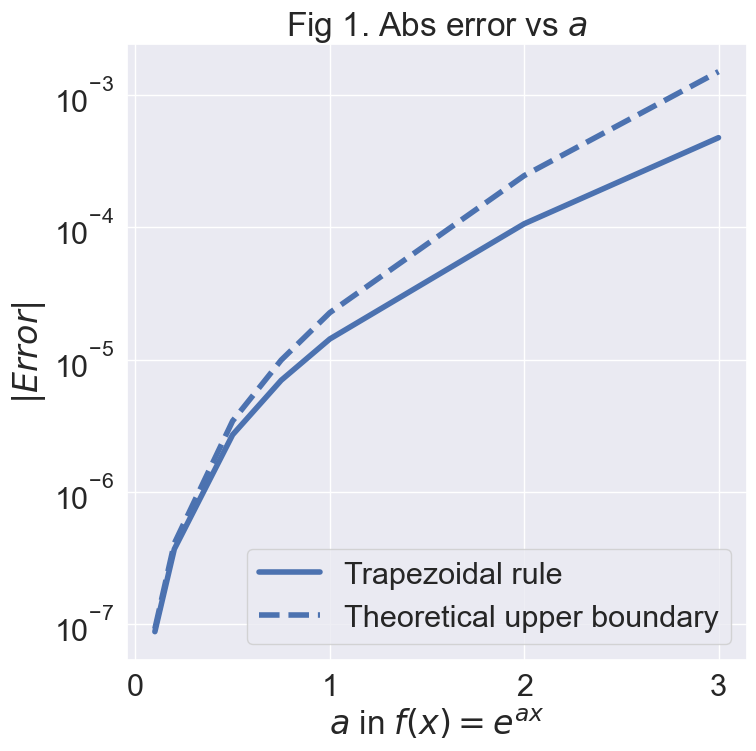

In [11]:
coefs = [0.1, 0.2, 0.5, 0.75, 1.0, 2.0, 3.0]
errs = []
theor_errs = []
a = 0
b = 1
n = 100
trap_err_mult = (b - a) ** 3 / (12 * n ** 2)

print(f'Trapezoidal rule for I of e**(ax) over [{a}, {b}]', end='\n---------------------------------------------\n')
print('a', 'Exact', 'I', 'Abs error', 'Theoretical error upper boundary', sep='\t')
for coef in coefs:
    #your code goes here
    exact = (np.e ** coef - 1) / coef # F(x) over [0, 1]
    f_x = lambda x: np.e ** (coef * x)
    I = trapezoidal(f_x, a, b, n)
    err = abs(exact - I)
    errs.append(err)
    f2_x = lambda x: coef ** 2 * f_x(x) # f''(x)
    theor_err = trap_err_mult * max(f2_x(a), f2_x(b))
    theor_errs.append(theor_err)
    print(f'{coef}\t{exact:.4f}\t{I:.4f}\t{err:.4e}\t{theor_err:.4e}')
    
plt.figure(figsize=(8,8))
#your code goes here
plt.plot(coefs, errs, 'b-', label='Trapezoidal rule')
plt.plot(coefs, theor_errs, 'b--', label='Theoretical upper boundary')
plt.title('Fig 1. Abs error vs $a$')
plt.xlabel('$a$ in $f(x) = e^{ax}$')
plt.ylabel('$\|Error|$')
plt.yscale('log')
plt.legend(loc='lower right');

### Task 6. Error and number of steps

Assume $[a,b]=[0,\pi/2]$. Consider the function $f(x)=\sin{x}$.
1. Compute exact value of the integral $\int_0^{\pi/2} \sin{x} dx$ analytically (variable `exact`)
2. Compute and plot errors for different values of $n$ for **all three methods**:

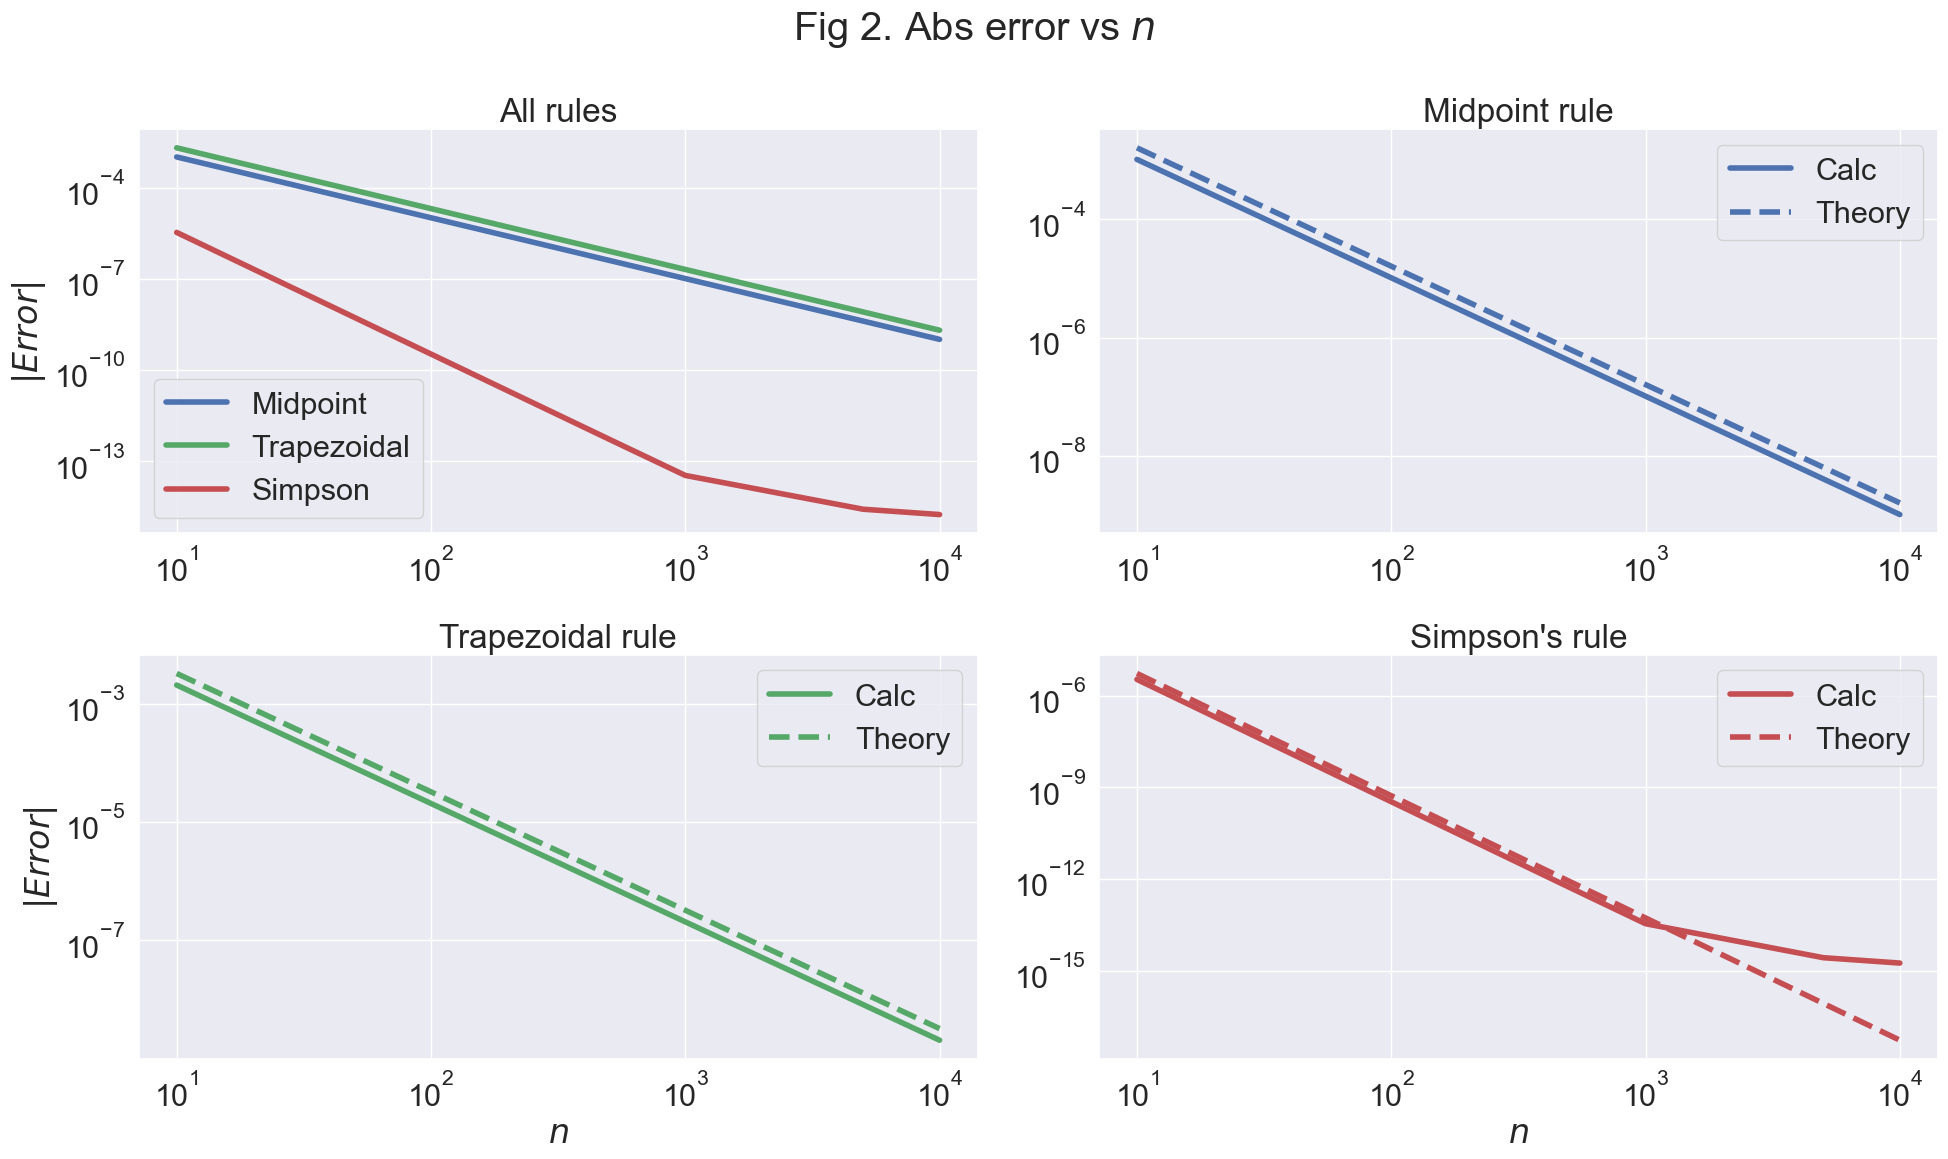

In [12]:
ns = [10, 50, 100, 500, 1000, 5000, 10000]
errs_mp = []
errs_trap = []
errs_simp = []
theor_errs_mp = []
theor_errs_trap = []
theor_errs_simp = []
a = 0
b = np.pi / 2
f_x = lambda x: np.sin(x)
f2_x = lambda x: np.cos(x) # f''(x)
f4_x = lambda x: np.sin(x) # f''''(x)

#your code goes here
exact = 1.0 # I = F(b) - F(a) = -cos(pi/2) + cos(0) = 1 

for n in ns:
    # your code goes here
    err_mult_mp = (b - a) ** 3 / (24 * n ** 2)
    err_mult_trap = (b - a) ** 3 / (12 * n ** 2)
    err_mult_simp = (b - a) ** 5 / (180 * n ** 4)

    I_mp = middle(f_x, a, b, n)
    err_mp = abs(exact - I_mp)
    errs_mp.append(err_mp)
    theor_err_mp = err_mult_mp * max(f2_x(a), f2_x(b))
    theor_errs_mp.append(theor_err_mp)
    
    I_trap = trapezoidal(f_x, a, b, n)
    err_trap = abs(exact - I_trap)
    errs_trap.append(err_trap)
    theor_err_trap = err_mult_trap * max(f2_x(a), f2_x(b))
    theor_errs_trap.append(theor_err_trap)
    
    I_simp = simpson(f_x, a, b, n)
    err_simp = abs(exact - I_simp)
    errs_simp.append(err_simp)
    theor_err_simp = err_mult_simp * max(f4_x(a), f4_x(b))
    theor_errs_simp.append(theor_err_simp)

plt.subplots(2, 2, figsize=(20, 12))

#plt.figure(figsize=(8,8))
#your code goes here
#please, use loglog scale!
fig = plt.gcf()
fig.suptitle('Fig 2. Abs error vs $n$')

plt.subplot(2, 2, 1)
plt.plot(ns, errs_mp, 'b-', label='Midpoint')
plt.plot(ns, errs_trap, 'g-', label='Trapezoidal')
plt.plot(ns, errs_simp, 'r-', label='Simpson')
plt.title('All rules')
#plt.xlabel('$n$')
plt.ylabel('$|Error|$')
plt.xscale('log')
plt.yscale('log')
plt.legend();

plt.subplot(2, 2, 2)
plt.plot(ns, errs_mp, 'b-', label='Calc')
plt.plot(ns, theor_errs_mp, 'b--', label='Theory')
plt.title('Midpoint rule')
#plt.xlabel('$n$')
#plt.ylabel('$|Error|$')
plt.xscale('log')
plt.yscale('log')
plt.legend();

plt.subplot(2, 2, 3)
plt.plot(ns, errs_trap, 'g-', label='Calc')
plt.plot(ns, theor_errs_trap, 'g--', label='Theory')
plt.title('Trapezoidal rule')
plt.xlabel('$n$')
plt.ylabel('$|Error|$')
plt.xscale('log')
plt.yscale('log')
plt.legend();

plt.subplot(2, 2, 4)
plt.plot(ns, errs_simp, 'r-', label='Calc')
plt.plot(ns, theor_errs_simp, 'r--', label='Theory')
plt.title("Simpson's rule")
plt.xlabel('$n$')
#plt.ylabel('$|Error|$')
plt.xscale('log')
plt.yscale('log')
plt.legend();

fig.tight_layout()


## Task 7. Results

Answer following questions in the field below:
1. By comparing three method which one is best to use for the function $x^x$?
2. Does estimations of error for $e^{ax}$ coincide with theoretical upper boundary per $a$? If not, where is the problem?
3. Does estimations of error for $\sin {x}$ coincide with theoretical upper boundary per $n$? If not, where is the problem?

1. The best method (error is lowest) is the Simpson's rule, then the Midpoint rule, then the Trapezoidal rule (error is highest) -- see Fig 2. Let's show that the calculated error ranking coincides with theoretical error ranking among the three integration rules.
Error of Midpoint rule is $|E_M| < \frac{\max_{x \in [a,b]} |f^{(2)}(x)|(b-a)^3}{24n^2}$. Error of Trapezoidal rule is $|E_T| < \frac{\max_{x \in [a,b]} |f^{(2)}(x)|(b-a)^3}{12n^2}$. The ratio of these two errors is $\frac{|E_M|}{|E_T|} = \frac{1}{2}$, which means that the theoretical upper boundary error of Midpoint rule is two times smaller than the same error of Trapezoidal rule. Error of Simpson's rule is $|E_S| < \frac{\max_{x \in [a,b]} |f^{(4)}(x)|(b-a)^5}{180n^4}$. The ratio $\frac{|E_S|}{|E_M|} = \frac{2(b-a)^2 \cdot \max_{x \in [a,b]} |f^{(4)}(x)|}{15n^2 \cdot \max_{x \in [a,b]} |f^{(2)}(x)|} \Rightarrow |E_S| \sim \frac{|E_M|}{n^2}$, which means that $|E_S|$ is roughly $n^2$ times smaller than $|E_M|$. So, $|E_S| \sim \frac{|E_M|}{n^2} = \frac{|E_T|}{2n^2}$, or $|E_S| < |E_M| < |E_T|$.

2. The estimation error of the Trapezoidal rule for $f(x) = e^{ax}$ coincides well with the theoretical upper boundary -- see Fig 1. It is clearly seen that the calculated error for different $a$ is always smaller than the theoretical error for the same value of $a$. Also, the error increases as the coefficient $a$ increases. This is expected, since the bigger $a$, the steeper the function $e^{ax}$ gets, i.e. it increases faster -- its derivatives are proportional to $a^{k}$, where $k$ is the number of the derivative. So we need a more granular partition, i.e. have more segments, to be able to "catch" smaller changes in the integrand function towards its argument, if we need to increase the accuracy of the calculation.

3. The estimation errors of all three numerical integration rules for $f(x) = \sin(x)$ coincide well with the theoretical upper boundaries for each rule -- see Fig 2. It is clearly seen that the calculated error for different $n$ is always smaller than the theoretical error for the same value of $n$. Also, the error decreases as the number of segments $n$ increases. This is expected, since as the partition gets more granular, we are able to "catch" smaller changes in the integrand function towards its argument, thus increasing the accuracy of the calculation. The only problem with the Simpson's rule is that at some value of $n$ the error stops decreasing and may begin to increase. This is because of float point computation limitations. As with numerical differentiation, as the step size gets smaller and smaller ($n$ gets bigger and bigger), the computation result may be not exactly correct, hence the estimation error may increase. As a solution, we may need to round computation results to some reasonable number of decimals or limit the maximal number of segments $n$.
